In [ ]:
import keras

Dense defines a layer of connected neurons

There is only one Dense -> one layer


Only one unit -> single neuron


Sequential means that the layers works in sequence

Input is only one value

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Two functions to be defined: loss and optimizer

Basically the ann tries to guess the relationship between x and y. How good it has been is defined by loss function. Then it tells to the optimizer which figures out next guess

sgd: stochastic gradient descent

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
import numpy as np
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Training: ask the model how to fit the xs values to the ys values

In [ ]:
model.fit(xs,ys, epochs=500)

In [ ]:
model.predict([10.0])

array([[18.982298]], dtype=float32)

Very few data

### Exercises

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
np.printoptions(linewidth=200)

In order to visualize the images we call the method `plt.imshow`

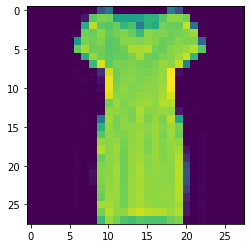

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[20])

However, if we want to see the array of the image, we do it like this:

In [ ]:
print(training_labels[20])
print(training_images[20])

3
[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 

Normalize the data to be in ranges between 0-1

In [ ]:
training_images = training_images/255.0
test_images = test_images/255.0

`Flatten()` -> makes the input array flat (only one dimension

`relu`-> If X>0 return X, else return 0. It only passes values greater than 0 to nex tlayer

`softmax`-> pick the highest value from a set of values [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05] -> [0,0,0,0,1,0,0,0,0] 

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

Compile and set `loss` , `optimizer` and `metrics` functions:

In [ ]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fit the model:

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4981 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8626
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8927


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 990us/step - loss: 0.3694 - accuracy: 0.8690


[0.3694172501564026, 0.8690000176429749]

Exercise 1 

In [ ]:
classifications = model.predict(test_images)

In [ ]:
classifications[0]

array([5.2127925e-05, 3.5585078e-08, 1.4564655e-06, 2.0547105e-07,
       5.2146220e-07, 6.7896990e-04, 7.0223668e-06, 1.2160943e-02,
       2.3499841e-05, 9.8707515e-01], dtype=float32)

In [ ]:
test_labels[0]

9

In [ ]:
classifications.shape

(10000, 10)

### Exercise 2

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4723
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3574
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3185
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2966
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3489


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4747
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3597
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3259
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3006
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3387


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4633
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3555
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3202
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2954
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3332


In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.6612
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4159
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3439
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2996
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4775


In [ ]:
len(training_images)

60000

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.7565
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3451
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3451


## Convolutional Neural Networks

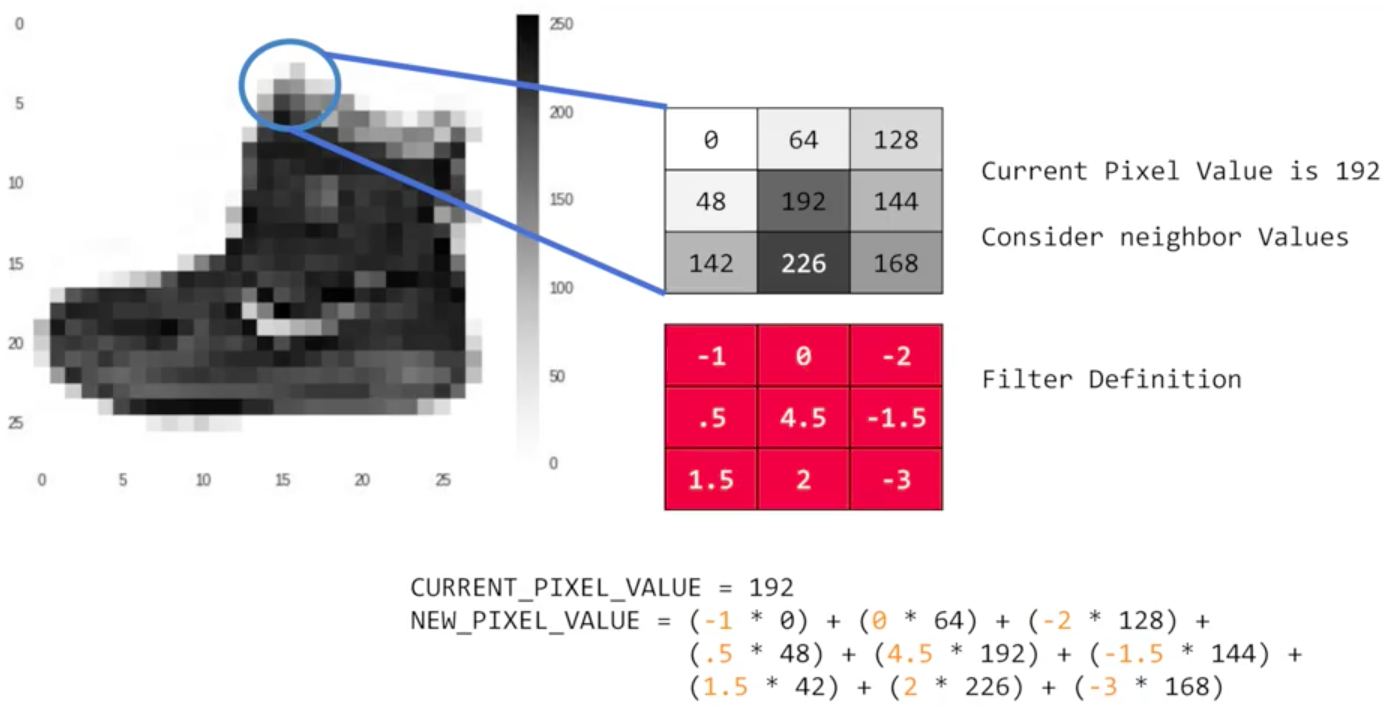



First convolutional layer: 64 filters (the red matrix in the image is a filter), Activation relu (avoid negatives) and input shape of 28x28 pixels in grey (single byte for colour depth)

The 64 filters start being random as k-nn and the good ones keep learning

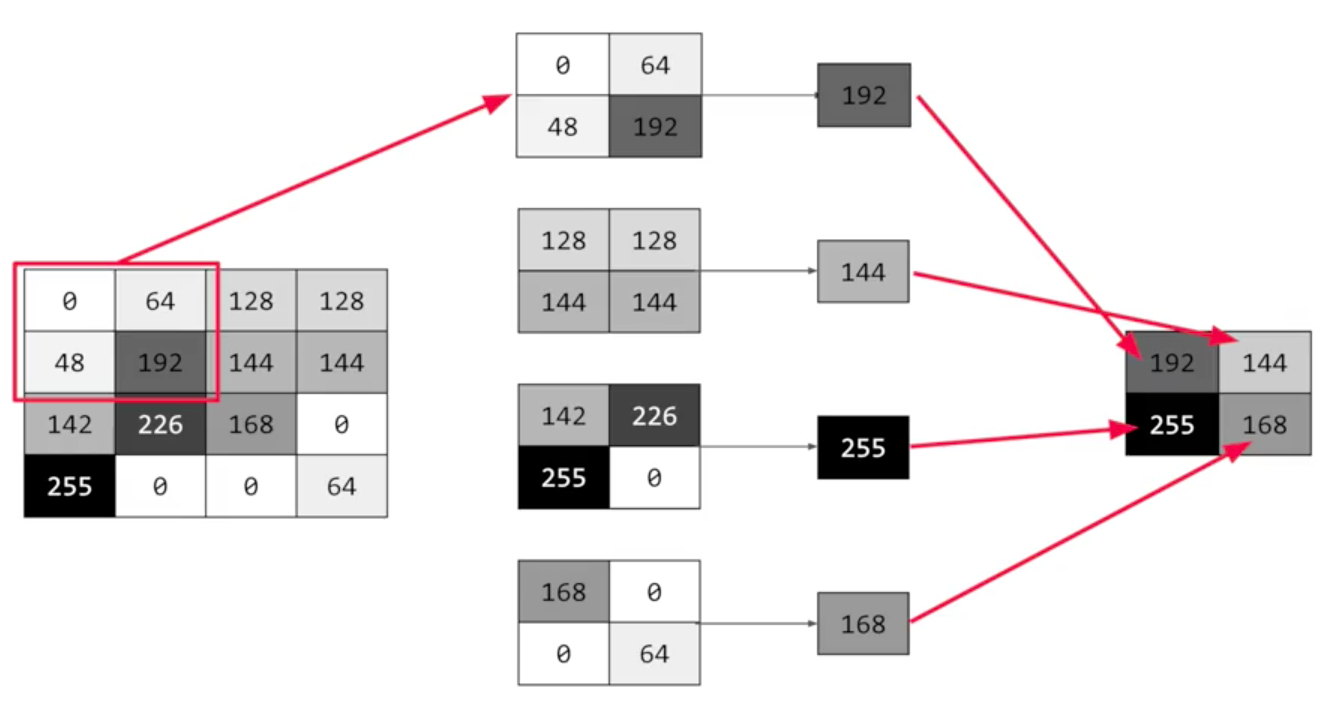

The second line is a pooling layer (it is max because it takes the max value) (2,2) -> For every four pixels, just 1 will survive.

Used to reduce the size.

The goal of doing the process two time is reduzing the complexity and getting just the features that determine the output

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

The output shape of the first layer is not (28, 28) because in the first three pixels in the corner no neighbors can be found top, right and left -> then 2 pixels smaller in the x and 2 pixels less in the y.

If filter would be (5, 5) -> 4 pixel smaller on x and y

The second layer is the first max pooling layer. Since it is (2, 2) it reduces 4 pixels into 1

Repeat the same logic to the next two layers.



---
The second maxpooling layer has a 64 output that means that 64 images of 5x5 -> flatting it (next layer) -> 1600 


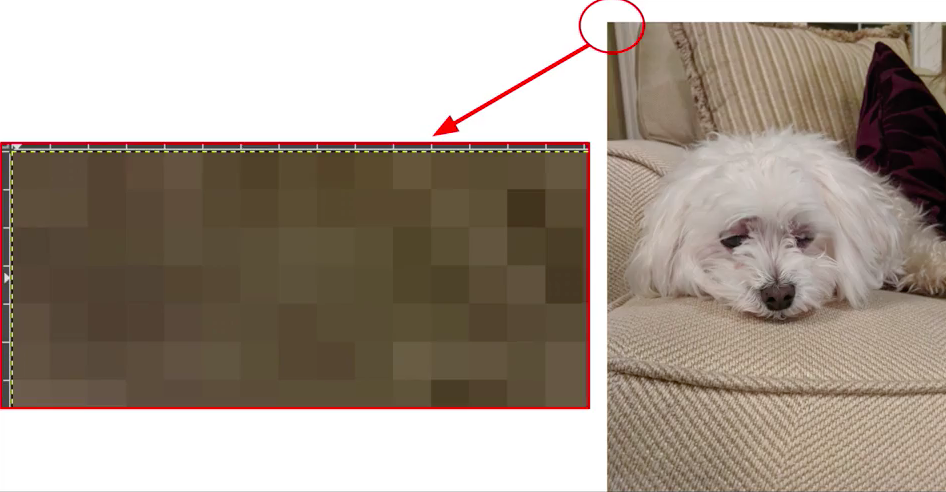

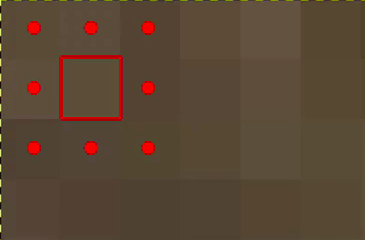

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
len(training_images), len(test_images)

(60000, 10000)

In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callback = myCallback()

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4452
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.2956
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2955


In [ ]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.3112


### Visualizing convolutions and pooling

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


The Keras API gives each convolution/pooling/dense... as a layer -> create a list of each layer's output

In [ ]:
model.layers

In [ ]:
layer_outputs

[<tf.Tensor 'conv2d_2/Relu:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_2/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_3/Softmax:0' shape=(None, 10) dtype=float32>]

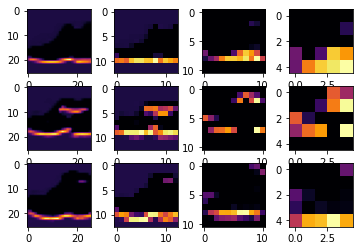

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Play with convolutions

In [ ]:
import cv2 # Package for computer vision problems
import numpy as np
from scipy import misc
i = misc.ascent() # Get the "ascent" image from scipy.misc

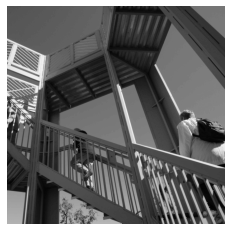

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
i

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [ ]:
i_transformed = np.copy(i)
i_transformed

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [ ]:
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
weight = 1
len(i_transformed), size_x, size_y

(512, 512, 512)

In [ ]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ]

In order to iterate through the image, we leave 1 pixel margin and multiply each of the values of the current pixel neighbours by the value of the filter

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight # Pay attention to weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

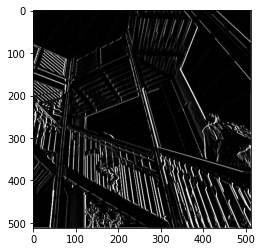

In [ ]:
plt.gray()
plt.imshow(i_transformed)
plt.show()

Trial of maxpool

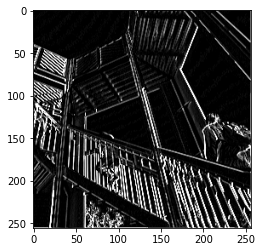

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

## Exercises

Create a dnn with one dense layer

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4910 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3717 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8911


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8714


[0.35765188932418823, 0.871399998664856]

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape # 60000 images of 28x28 pixels

(60000, 28, 28)

In [ ]:
train_images.max(), train_images.min() # Check in which scale the image values range

(255, 0)

In [ ]:
train_images[1]/255.0 # Explore what happens when normalizing

In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images/255.0
test_images = train_images.reshape(10000, 28, 28, 1)
test_images = train_images/255.0

The shape of the images has been shaped in order to fit with the shape of the convolution network, which is defined to be of 1 byte (grey)

optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy'

Adam is a method of optimization in place of stochastic gradient descent.

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.3.0
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)         